# Import data

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import sys
sys.path.append('../src')
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures


In [2]:
features_data = pd.read_csv('../data/processed/features_winsorized.csv')
origin_cols = features_data
discrete_cols = ['installment_rate', 'residence_since', 'existing_credits', 'num_dependents']
numeric_cols = features_data.select_dtypes(include=['number']).columns
continues_cols = [col for col in numeric_cols if col not in discrete_cols]
category_cols = [col for col in origin_cols if col not in numeric_cols]

print(f'category cols:{category_cols}',f'\n continues cols:{continues_cols}; discrete cols:{discrete_cols}')

category cols:['checking_account_status', 'credit_history', 'purpose', 'savings_account', 'employment_since', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'] 
 continues cols:['duration', 'credit_amount', 'age']; discrete cols:['installment_rate', 'residence_since', 'existing_credits', 'num_dependents']


# Log Positively-skewed Data

for the reason that the distributions of `age`,`credit_amount` and `duration` are all positively skewed, we make log transformation here.

In [3]:
for col in continues_cols:

    features_data[col] =np.log1p(features_data[col])

# Category Encoding

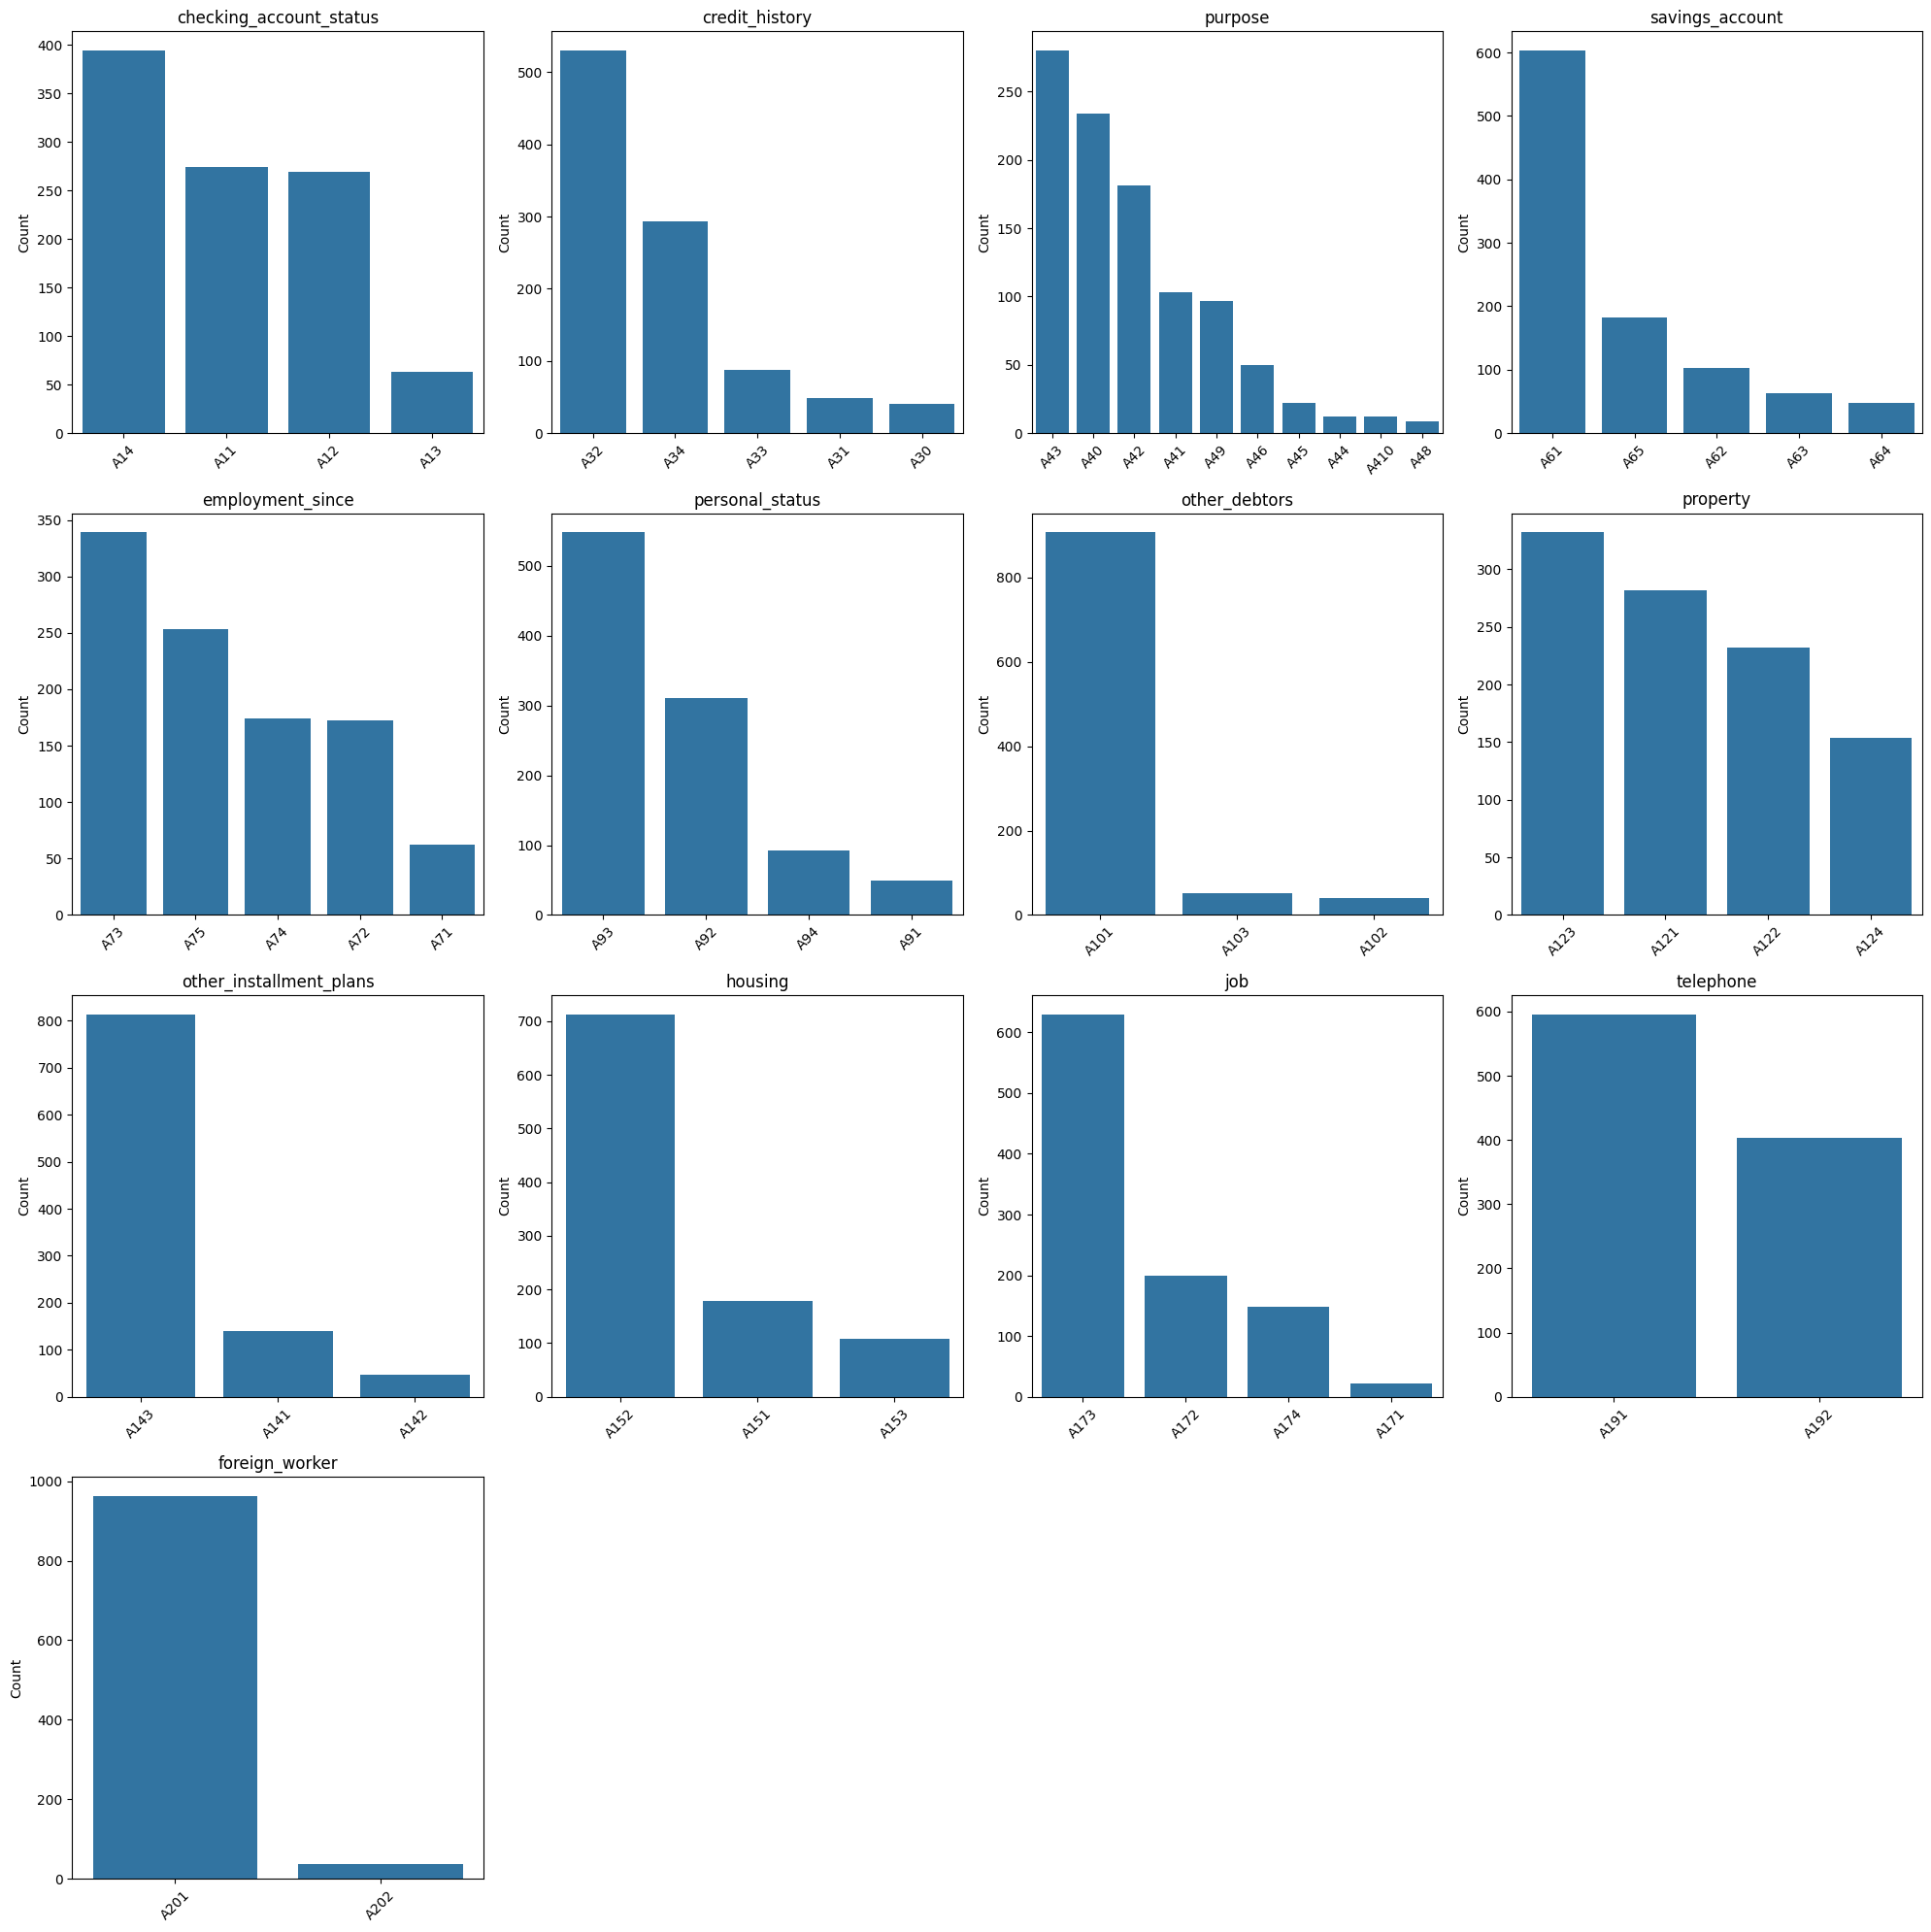

In [7]:
n_cols = 4
n_rows = (len(category_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(category_cols):
    sns.countplot(data=features_data, x=col, ax=axes[i], order=features_data[col].value_counts().index)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(category_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [8]:
one_hot = ['personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']
label_encode = ['checking_account_status', 'savings_account', 'employment_since']
freq = ['credit_history', 'purpose']

In [9]:
# one-hot encoding
features_data = pd.get_dummies(features_data, columns=one_hot, drop_first=True)

# label encoding
le = LabelEncoder()
for col in label_encode:
    features_data[col] = le.fit_transform(features_data[col])

# frequency encoding
for col in freq:
    freq_map = features_data[col].value_counts(normalize=True)
    features_data[col] = features_data[col].map(freq_map)

features_data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,residence_since,age,...,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,0,1.945910,0.293,0.280,7.064759,4,4,4,4,4.204693,...,False,False,True,True,False,False,True,False,True,False
1,1,3.891820,0.530,0.280,8.691483,0,2,2,2,3.135494,...,False,False,True,True,False,False,True,False,False,False
2,3,2.564949,0.293,0.050,7.648263,0,3,2,3,3.912023,...,False,False,True,True,False,True,False,False,False,False
3,0,3.761200,0.530,0.181,8.972464,0,3,2,4,3.828641,...,False,False,True,False,True,False,True,False,False,False
4,0,3.218876,0.088,0.234,8.491055,0,2,3,4,3.988984,...,True,False,True,False,True,False,True,False,False,False


# Create a New Feature

In [10]:
features_data['monthly_payment_estimate'] = features_data['credit_amount'] / features_data['duration']

In [11]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   checking_account_status       1000 non-null   int64  
 1   duration                      1000 non-null   float64
 2   credit_history                1000 non-null   float64
 3   purpose                       1000 non-null   float64
 4   credit_amount                 1000 non-null   float64
 5   savings_account               1000 non-null   int64  
 6   employment_since              1000 non-null   int64  
 7   installment_rate              1000 non-null   int64  
 8   residence_since               1000 non-null   int64  
 9   age                           1000 non-null   float64
 10  existing_credits              1000 non-null   int64  
 11  num_dependents                1000 non-null   int64  
 12  personal_status_A92           1000 non-null   bool   
 13  pers

In [12]:
features_data.to_csv('../data/processed/features_fe.csv', index=False)